Tutorial 2: Profiles
====================

In this example, we'll create a _Grid_ of Cartesian (y,x) coordinates and pass it to the 'light_profiles'  module to
create images on this _Grid_ and the 'mass_profiles' module to create deflection-angle maps on this grid.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

Lets use the same _Grid_ as the previous tutorial (if you skipped that tutorial, I recommend you go back to it!)

In [2]:
grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=2)

Next, lets create a _LightProfile_ using the 'light_profiles' module, which in PyAutoLens is imported as 'lp' for 
conciseness. We'll use an _EllipticalSersic_ function, which is an analytic function often use to depict galaxies.

(If you are unsure what the 'elliptical_comps' are, I'll give a description of them at the end of the tutorial.)

In [43]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.2, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

We can print a _Profile_ to confirm its parameters.

In [44]:
print(sersic_light_profile)

EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.2, 0.111111)
axis_ratio: 0.6276151247887909
phi: 30.472710112304288
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


We can pass a _Grid_ to a _LightProfile_ to compute its intensity at every _Grid_ coordinate, using a '_from_grid
method

In [28]:
light_image = sersic_light_profile.image_from_grid(grid=grid)

Much like the _Grid_ objects in the previous tutorials, these functions return PyAutoLens _Array_ objects which are 
accessible in both 2D and 1D.

In [29]:
print(light_image.shape_2d)
print(light_image.shape_1d)
print(light_image.in_2d[0, 0])
print(light_image.in_1d[0])
print(light_image.in_2d)
print(light_image.in_1d)

(100, 100)
10000
0.013578199900024488
0.013578199900024488
[[0.0135782  0.0138993  0.01422592 ... 0.01422592 0.0138993  0.0135782 ]
 [0.01408381 0.01441894 0.01475991 ... 0.01475991 0.01441894 0.01408381]
 [0.0146061  0.01495584 0.01531174 ... 0.01531174 0.01495584 0.0146061 ]
 ...
 [0.0146061  0.01495584 0.01531174 ... 0.01531174 0.01495584 0.0146061 ]
 [0.01408381 0.01441894 0.01475991 ... 0.01475991 0.01441894 0.01408381]
 [0.0135782  0.0138993  0.01422592 ... 0.01422592 0.0138993  0.0135782 ]]
[0.0135782  0.0138993  0.01408381 ... 0.01408381 0.0138993  0.0135782 ]


The values computed (e.g. the image) are calculated on the sub-grid and the returned values are stored on the sub-grid, 
which in this case is a 200 x 200 grid.

In [30]:
print(light_image.sub_shape_2d)
print(light_image.sub_shape_1d)
print(light_image.in_2d[0, 0])
print(light_image[0])

(200, 200)
40000
0.013578199900024488
0.013578199900024488


The benefit of storing all the values on the sub-grid, is that we can now use these values to bin-up the regular grid's 
shape by taking the mean of each intensity value computed on the sub-grid. This ensures that aliasing effects due to 
computing intensities at only one pixel coordinate inside a full pixel do not degrade the image we create.

In [31]:
print("intensity of top-left _Grid_ pixel:")
print(light_image.in_2d_binned[0, 0])
print(light_image.in_1d_binned[0])

intensity of top-left _Grid_ pixel:
0.01399506110446343
0.01399506110446343


If you find these 2D and 1D _Array_'s confusing - I wouldn't worry about it. From here on, we'll pretty much just use 
these _Array_'s as they returned to us from functions and not think about if they should be in 2D or 1D. Nevertheless, 
its important that you understand PyAutoLens offers these 2D and 1D representations - as it'll help us later when we 
cover fititng lens data!

We can use a _Profile_ _Plotter_ to plot this image.

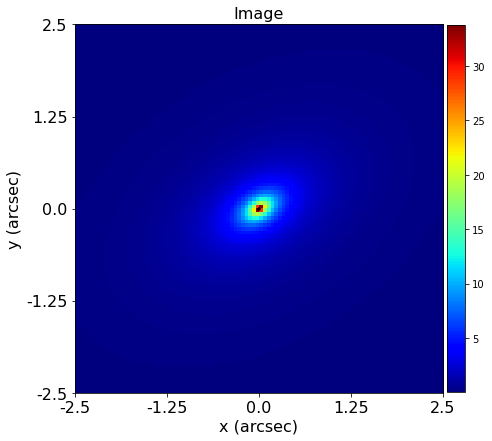

In [45]:
aplt.LightProfile.image(light_profile=sersic_light_profile, grid=grid)

To perform ray-tracing, we need to create a _MassProfile_ from the 'mass_profiles' module, which we import as 'mp' for 
conciseness. 

A _MassProfile_ is an analytic function that describes the distribution of mass in a galaxy, and therefore 
can be used to derive its surface-density, gravitational potential and most importantly, its deflection angles. For 
those unfamiliar with lensing, the deflection angles describe how light is bent by the _MassProfile_ due to the 
curvature of space-time.

In [21]:
sis_mass_profile = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)

print(sis_mass_profile)

SphericalIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


Just like above, we can pass a _Grid_ to a _MassProfile_ to compute its deflection angles. These are returned as the 
_Grid_'s we used in the previous tutorials, so have full access to the 2D / 1D methods and mappings. And, just like 
the image above, they are computed on the sub-grid, so that we can bin up their values to compute more accurate 
deflection angles.

(If you are new to gravitiational lensing, and are unclear on what a 'deflection-angle' means or what it is used for, 
then I'll explain all in tutorial 4 of this chapter. For now, just look at the pretty pictures they make, and worry 
about what they mean in tutorial 4!).

In [22]:
mass_profile_deflections = sis_mass_profile.deflections_from_grid(grid=grid)

print("deflection-angles of _Grid_ sub-pixel 0:")
print(mass_profile_deflections.in_2d[0, 0])
print("deflection-angles of _Grid_ sub-pixel 1:")
print(mass_profile_deflections.in_2d[0, 1])
print()
print("deflection-angles of _Grid_ pixel 0:")
print(mass_profile_deflections.in_2d_binned[0, 1])
print()
print("deflection-angles of central _Grid_ pixels:")
print(mass_profile_deflections.in_2d_binned[49, 49])
print(mass_profile_deflections.in_2d_binned[49, 50])
print(mass_profile_deflections.in_2d_binned[50, 49])
print(mass_profile_deflections.in_2d_binned[50, 50])

deflection-angles of _Grid_ sub-pixel 0:
[ 1.13137085 -1.13137085]
deflection-angles of _Grid_ sub-pixel 1:
[ 1.13707034 -1.1256425 ]

deflection-angles of _Grid_ pixel 0:
[ 1.14284852 -1.11976067]

deflection-angles of central _Grid_ pixels:
[ 1.07164985 -1.07164985]
[1.07164985 1.07164985]
[-1.07164985 -1.07164985]
[-1.07164985  1.07164985]


A _Profile_ _Plotter_ can plot these deflection angles.

(The black line is the 'critical curve' of the _MassProfile_. We'll cover what this in a later tutorial.)

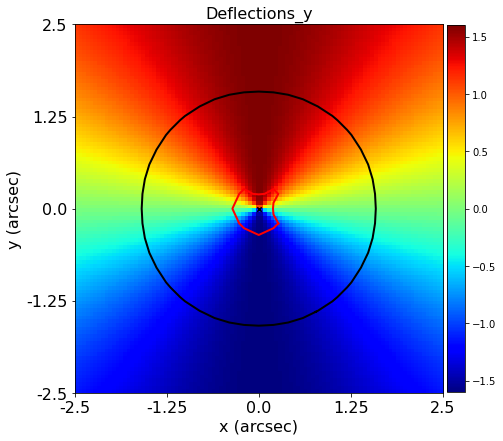

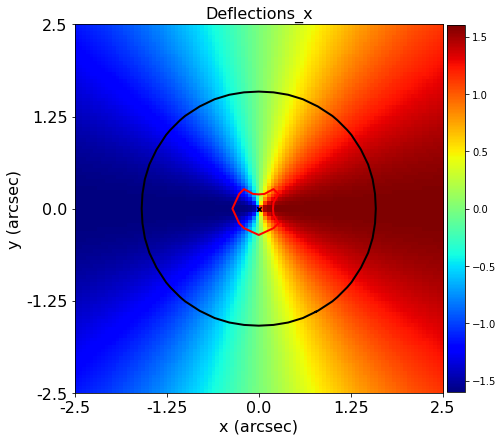

In [23]:
aplt.MassProfile.deflections_y(mass_profile=sis_mass_profile, grid=grid)
aplt.MassProfile.deflections_x(mass_profile=sis_mass_profile, grid=grid)

_MassProfile_'s have a range of other properties that are used for lensing calculations, a couple of which we've plotted 
images of below:

   - Convergence: The surface mass density of the _MassProfile_ in dimensionless units which are convenient for 
                  lensing calcuations.
   - Potential: The gravitational of the _MassProfile_ again in convenient dimensionless units.
   - Magnification: Describes how much brighter each image-pixel appears due to focusing of light rays by the _MassProfile_.

Extracting _Array_'s of these quantities from PyAutoLens is exactly the same as for the image and deflection angles above.

In [24]:
mass_profile_convergence = sis_mass_profile.convergence_from_grid(grid=grid)

mass_profile_potential = sis_mass_profile.potential_from_grid(grid=grid)

mass_profile_magnification = sis_mass_profile.magnification_from_grid(grid=grid)

Plotting them is equally straight forward.

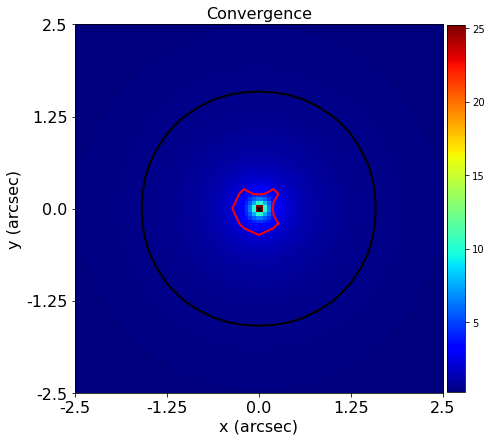

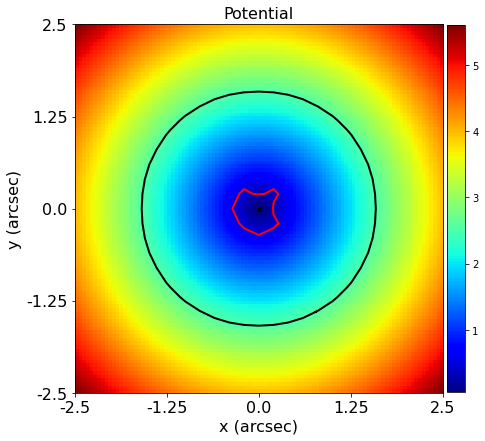

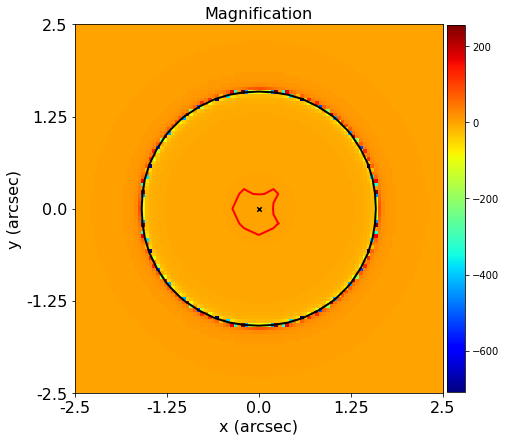

In [25]:
aplt.MassProfile.convergence(mass_profile=sis_mass_profile, grid=grid)

aplt.MassProfile.potential(mass_profile=sis_mass_profile, grid=grid)

aplt.MassProfile.magnification(mass_profile=sis_mass_profile, grid=grid)

Congratulations, you've completed your second PyAutoLens tutorial! 

___Elliptical Components___

The 'elliptical_comps' describe the ellipticity of the geometry of the light and mass profiles. You may be more 
familiar with a coordinate system where the ellipse is defined in terms of:

   - axis_ratio = semi-major axis / semi-minor axis = b/a
   - position angle phi, where phi is in degrees.

We can use the **PyAutoLens** *convert* module to determine the elliptical components from the axis-ratio and phi,
noting that the position angle phi is defined counter-clockwise from the positive x-axis.

In [46]:
elliptical_comps = al.convert.elliptical_comps_from(axis_ratio=0.5, phi=45.0)

print(elliptical_comps)

(0.3333333333333333, 2.041077998578922e-17)


The elliptical components are related to the axis-ratio and position angle phi as follows:

    fac = (1 - axis_ratio) / (1 + axis_ratio)
    
    elliptical_comp[0] = elliptical_comp_y = fac * np.sin(2 * phi)
    elliptical_comp[1] = elliptical_comp_x = fac * np.cos(2 * phi)

The reason we use the elliptical components, instead of the axis-ratio and phi, to define a _Profile_ geometry is that it
improves the lens modeling process. What is lens modeling? You'll find out in chapter 2!